In [1]:
import pandas as pd
import glob

# files=glob.glob('온도*.txt')

# temp = []
# for filename in files:
#     temp.append(pd.read_csv(filename, sep='\t', encoding='cp949'))


# temp = pd.concat(temp, ignore_index=True)

files=glob.glob('전력*.txt')

ele = []
for filename in files:
    ele.append(pd.read_csv(filename, sep='\t', encoding='cp949'))


ele = pd.concat(ele, ignore_index=True)

In [2]:
# ele_drop.to_csv('ele_tttt.csv', index=False, encoding='euc-kr')


In [3]:
ele

,H_ID,HA,ST_DATE,APT_TF,M2,PersonCount,PointName,H00_1,H00_2,H00_3,...,H22_3,H22_4,H22_5,H22_6,H23_1,H23_2,H23_3,H23_4,H23_5,H23_6
0,1,전력총합,2012-03-01,아파트,20평~29평,2인이하,전력총합,0.009,0.009,0.021,...,0.039,0.037,0.029,0.027,0.033,0.041,0.033,0.036,0.051,0.054
1,1,전력총합,2012-03-02,아파트,20평~29평,2인이하,전력총합,0.052,0.051,0.043,...,0.087,0.069,0.046,0.090,0.082,0.072,0.194,0.091,0.086,0.067
2,1,전력총합,2012-03-03,아파트,20평~29평,2인이하,전력총합,0.050,0.062,0.065,...,0.036,0.035,0.000,0.034,0.034,0.037,0.015,0.043,0.034,0.034
3,1,전력총합,2012-03-04,아파트,20평~29평,2인이하,전력총합,0.033,0.033,0.021,...,0.125,0.080,0.057,0.088,0.082,0.109,0.084,0.047,0.037,0.029
4,1,전력총합,2012-03-05,아파트,20평~29평,2인이하,전력총합,0.028,0.028,0.021,...,0.034,0.058,0.036,0.028,0.037,0.030,0.027,0.044,0.047,0.057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159890,263,모니터,2012-08-27,비아파트,20평~29평,2인이하,모니터,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
159891,263,모니터,2012-08-28,비아파트,20평~29평,2인이하,모니터,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
159892,263,모니터,2012-08-29,비아파트,20평~29평,2인이하,모니터,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
159893,263,모니터,2012-08-30,비아파트,20평~29평,2인이하,모니터,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [4]:
# 강사님 말대로 0.01 더해주기
ele.iloc[:,7:] = ele.iloc[:,7:]+0.01

In [371]:
# 필요없는 변수제거
ele_drop = ele.drop(['HA','APT_TF','M2','PersonCount'], axis=1)

# 그중 건물 하나만 선택
elenum = ele_drop[ele_drop['H_ID'] == 142]

# 전력 총합과 가전기기 나누기
ele_total = elenum[elenum['PointName'] == '전력총합']
ele_se = elenum[elenum['PointName'] == '공기청정기']


ele_total = ele_total.sort_values(['H_ID','ST_DATE'])
ele_se = ele_se.sort_values(['H_ID','ST_DATE'])


In [372]:
ele_se

,H_ID,ST_DATE,PointName,H00_1,H00_2,H00_3,H00_4,H00_5,H00_6,H01_1,...,H22_3,H22_4,H22_5,H22_6,H23_1,H23_2,H23_3,H23_4,H23_5,H23_6
136548,142,2012-01-13,공기청정기,0.011,0.010,0.010,0.010,0.011,0.010,0.010,...,0.010,0.010,0.011,0.010,0.010,0.011,0.010,0.010,0.011,0.010
136554,142,2012-01-21,공기청정기,0.010,0.011,0.010,0.011,0.010,0.011,0.010,...,0.010,0.011,0.010,0.011,0.010,0.011,0.010,0.010,0.011,0.010
136559,142,2012-01-22,공기청정기,0.011,0.010,0.011,0.010,0.010,0.011,0.010,...,0.010,0.011,0.010,0.011,0.010,0.010,0.011,0.010,0.011,0.010
136564,142,2012-01-23,공기청정기,0.011,0.010,0.010,0.011,0.010,0.011,0.010,...,0.010,0.011,0.010,0.011,0.010,0.010,0.011,0.010,0.011,0.010
136570,142,2012-01-24,공기청정기,0.010,0.011,0.010,0.011,0.010,0.011,0.010,...,0.010,0.011,0.011,0.011,0.011,0.011,0.011,0.011,0.010,0.011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109738,142,2012-10-10,공기청정기,0.010,0.011,0.011,0.011,0.010,0.011,0.011,...,0.017,0.017,0.017,0.016,0.018,0.017,0.016,0.018,0.017,0.017
109744,142,2012-10-11,공기청정기,0.016,0.017,0.018,0.017,0.016,0.018,0.016,...,0.016,0.018,0.017,0.017,0.017,0.017,0.017,0.018,0.017,0.017
109750,142,2012-10-12,공기청정기,0.017,0.017,0.018,0.017,0.017,0.017,0.017,...,0.018,0.017,0.016,0.017,0.017,0.018,0.016,0.017,0.018,0.016
109756,142,2012-10-13,공기청정기,0.018,0.017,0.017,0.018,0.017,0.018,0.017,...,0.018,0.017,0.017,0.016,0.018,0.017,0.018,0.017,0.018,0.016


In [373]:
ele_total

,H_ID,ST_DATE,PointName,H00_1,H00_2,H00_3,H00_4,H00_5,H00_6,H01_1,...,H22_3,H22_4,H22_5,H22_6,H23_1,H23_2,H23_3,H23_4,H23_5,H23_6
136552,142,2012-01-13,전력총합,0.020,0.027,0.052,0.041,0.052,0.011,0.024,...,0.052,0.015,0.024,0.020,0.047,0.012,0.035,0.028,0.012,0.042
136558,142,2012-01-21,전력총합,0.019,0.039,0.036,0.034,0.052,0.022,0.047,...,0.026,0.031,0.049,0.015,0.041,0.048,0.046,0.015,0.039,0.025
136563,142,2012-01-22,전력총합,0.025,0.045,0.010,0.037,0.025,0.025,0.048,...,0.025,0.025,0.048,0.028,0.036,0.041,0.015,0.011,0.052,0.034
136568,142,2012-01-23,전력총합,0.035,0.047,0.019,0.019,0.032,0.025,0.025,...,0.027,0.025,0.025,0.025,0.047,0.028,0.032,0.047,0.014,0.010
136574,142,2012-01-24,전력총합,0.052,0.025,0.025,0.025,0.048,0.044,0.025,...,0.025,0.019,0.020,0.043,0.040,0.014,0.045,0.032,0.014,0.042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109742,142,2012-10-10,전력총합,0.070,0.044,0.076,0.048,0.040,0.030,0.046,...,0.133,0.135,0.134,0.100,0.091,0.080,0.076,0.078,0.062,0.089
109748,142,2012-10-11,전력총합,0.077,0.081,0.064,0.046,0.057,0.040,0.056,...,0.087,0.096,0.094,0.086,0.092,0.096,0.101,0.091,0.095,0.054
109754,142,2012-10-12,전력총합,0.088,0.037,0.054,0.041,0.039,0.052,0.039,...,0.095,0.084,0.107,0.117,0.108,0.110,0.073,0.063,0.053,0.090
109760,142,2012-10-13,전력총합,0.040,0.054,0.031,0.049,0.037,0.048,0.037,...,0.115,0.113,0.094,0.093,0.069,0.055,0.038,0.060,0.095,0.041


In [374]:
ele_merge = pd.merge(ele_total, ele_se, on = 'ST_DATE')

In [375]:
ele_merge

,H_ID_x,ST_DATE,PointName_x,H00_1_x,H00_2_x,H00_3_x,H00_4_x,H00_5_x,H00_6_x,H01_1_x,...,H22_3_y,H22_4_y,H22_5_y,H22_6_y,H23_1_y,H23_2_y,H23_3_y,H23_4_y,H23_5_y,H23_6_y
0,142,2012-01-13,전력총합,0.020,0.027,0.052,0.041,0.052,0.011,0.024,...,0.010,0.010,0.011,0.010,0.010,0.011,0.010,0.010,0.011,0.010
1,142,2012-01-21,전력총합,0.019,0.039,0.036,0.034,0.052,0.022,0.047,...,0.010,0.011,0.010,0.011,0.010,0.011,0.010,0.010,0.011,0.010
2,142,2012-01-22,전력총합,0.025,0.045,0.010,0.037,0.025,0.025,0.048,...,0.010,0.011,0.010,0.011,0.010,0.010,0.011,0.010,0.011,0.010
3,142,2012-01-23,전력총합,0.035,0.047,0.019,0.019,0.032,0.025,0.025,...,0.010,0.011,0.010,0.011,0.010,0.010,0.011,0.010,0.011,0.010
4,142,2012-01-24,전력총합,0.052,0.025,0.025,0.025,0.048,0.044,0.025,...,0.010,0.011,0.011,0.011,0.011,0.011,0.011,0.011,0.010,0.011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,142,2012-10-10,전력총합,0.070,0.044,0.076,0.048,0.040,0.030,0.046,...,0.017,0.017,0.017,0.016,0.018,0.017,0.016,0.018,0.017,0.017
104,142,2012-10-11,전력총합,0.077,0.081,0.064,0.046,0.057,0.040,0.056,...,0.016,0.018,0.017,0.017,0.017,0.017,0.017,0.018,0.017,0.017
105,142,2012-10-12,전력총합,0.088,0.037,0.054,0.041,0.039,0.052,0.039,...,0.018,0.017,0.016,0.017,0.017,0.018,0.016,0.017,0.018,0.016
106,142,2012-10-13,전력총합,0.040,0.054,0.031,0.049,0.037,0.048,0.037,...,0.018,0.017,0.017,0.016,0.018,0.017,0.018,0.017,0.018,0.016


In [376]:
# 칼럼명들 재정립하기

title = ['H_ID_x', 'ST_DATE', 'PointName_x']

for i in range(144) :
    title.append('x')
    
title.append('H_ID_y')
title.append('PointName_y')

for i in range(144) :
    title.append('y')
    
ele_merge.columns = title

In [377]:
len(title)

293

In [291]:
ele_merge.head(50)

,H_ID_x,ST_DATE,PointName_x,x,x,x,x,x,x,x,...,y,y,y,y,y,y,y,y,y,y
0,118,2012-01-06,전력총합,0.028,0.045,0.033,0.035,0.046,0.038,0.030,...,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010,0.010
1,118,2012-01-07,전력총합,0.048,0.038,0.049,0.020,0.031,0.019,0.045,...,0.010,0.010,0.010,0.010,0.037,0.037,0.037,0.036,0.035,0.036
2,118,2012-01-09,전력총합,0.045,0.039,0.017,0.039,0.010,0.028,0.050,...,0.036,0.036,0.038,0.038,0.037,0.035,0.035,0.035,0.029,0.010
3,118,2012-01-13,전력총합,0.039,0.041,0.026,0.024,0.030,0.037,0.040,...,0.030,0.031,0.032,0.028,0.031,0.031,0.032,0.034,0.029,0.026
4,118,2012-01-17,전력총합,0.033,0.052,0.022,0.050,0.026,0.050,0.026,...,0.030,0.031,0.011,0.040,0.039,0.037,0.038,0.038,0.029,0.026
5,118,2012-01-18,전력총합,0.033,0.047,0.042,0.010,0.038,0.046,0.017,...,0.035,0.035,0.035,0.034,0.035,0.035,0.035,0.036,0.029,0.026
6,118,2012-01-19,전력총합,0.035,0.017,0.036,0.039,0.019,0.052,0.012,...,0.010,0.023,0.041,0.028,0.031,0.031,0.032,0.034,0.029,0.026
7,118,2012-01-20,전력총합,0.036,0.015,0.051,0.020,0.011,0.032,0.032,...,0.030,0.031,0.032,0.028,0.031,0.031,0.032,0.034,0.029,0.026
8,118,2012-01-21,전력총합,0.033,0.042,0.048,0.018,0.035,0.032,0.018,...,0.039,0.034,0.032,0.028,0.031,0.031,0.032,0.034,0.029,0.026
9,118,2012-01-22,전력총합,0.039,0.027,0.040,0.024,0.014,0.044,0.027,...,0.036,0.033,0.034,0.035,0.035,0.035,0.035,0.038,0.038,0.038


In [332]:
# feature 셑 구성하기

ele_xy = ele_merge.iloc[:, [3, 149]]

ele_xy

,x,y
0,0.028,0.033
1,0.048,0.010
2,0.045,0.033
3,0.039,0.033
4,0.033,0.033
...,...,...
124,0.035,0.033
125,0.023,0.033
126,0.025,0.033
127,0.048,0.033


In [333]:
# x와 y값 짝지어 2열로 정렬 쫙 해버리기


cnt = 3
cnt1 = 149

while cnt < 146 :
    cnt = cnt + 1
    cnt1 = cnt1 + 1 
    plus = ele_merge.iloc[:, [cnt, cnt1]]
    ele_xy = ele_xy.append(plus)
    

In [334]:
ele_xy

,x,y
0,0.028,0.033
1,0.048,0.010
2,0.045,0.033
3,0.039,0.033
4,0.033,0.033
...,...,...
124,0.032,0.026
125,0.034,0.026
126,0.024,0.026
127,0.017,0.026


In [335]:
ele_xy['hour'] = 3

In [336]:
# hour num에 0123순으로 만들고

num = []
for a in range(24) :
    num.append(a)
    num.append(a)
    num.append(a)
    num.append(a)
    num.append(a)
    num.append(a)

In [337]:
# hour 값 넣어주기

cnt3 = 0
for b in range(ele_xy['x'].count()) :
    ele_xy.iloc[b, 2] = num[cnt3]
    cnt3 += 1
    if cnt3 == 144 :
        cnt3 = 0

In [378]:
ele_xy['x'].count()

18576

In [379]:
month = []

b=0
for i in range(129):
    for j in range(144):
        month.append(ele['ST_DATE'][i][5:7])
    b+=1
month

['03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',
 '03',

In [380]:
ele_xy['month']= month

In [381]:
ele_xy.isnull().sum()

x        0
y        0
hour     0
month    0
dtype: int64

In [382]:
ele_xy

,x,y,hour,month
0,0.028,1.0,0,03
1,0.048,0.0,0,03
2,0.045,1.0,0,03
3,0.039,1.0,0,03
4,0.033,1.0,0,03
...,...,...,...,...
124,0.032,1.0,23,03
125,0.034,1.0,23,03
126,0.024,1.0,23,03
127,0.017,1.0,23,03


In [383]:
ele_X = ele_xy.iloc[:, [0,2,3]]
ele_y = ele_xy.iloc[:, 1]

In [452]:
ele_yy = ele_xy.iloc[:, [1]]
ele_yy

,y
0,1.0
1,0.0
2,1.0
3,1.0
4,1.0
...,...
124,1.0
125,1.0
126,1.0
127,1.0


In [442]:
ele_X

,x,hour,month
0,0.028,0,03
1,0.048,0,03
2,0.045,0,03
3,0.039,0,03
4,0.033,0,03
...,...,...,...
124,0.032,23,03
125,0.034,23,03
126,0.024,23,03
127,0.017,23,03


In [403]:
ele_Y

0      1.0
1      0.0
2      1.0
3      1.0
4      1.0
      ... 
124    1.0
125    1.0
126    1.0
127    1.0
128    1.0
Name: y, Length: 18576, dtype: float64

In [385]:
ele_se.describe(percentiles=[.10,.20,.30,.40,.60,.70,.80,.90])

,H_ID,H00_1,H00_2,H00_3,H00_4,H00_5,H00_6,H01_1,H01_2,H01_3,...,H22_3,H22_4,H22_5,H22_6,H23_1,H23_2,H23_3,H23_4,H23_5,H23_6
count,142.0,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,...,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,142.0,0.014655,0.014599,0.014662,0.014669,0.014641,0.014669,0.014655,0.014556,0.014824,...,0.014852,0.014923,0.014817,0.014880,0.014873,0.014831,0.014810,0.014648,0.014655,0.014859
std,0.0,0.002763,0.002770,0.002726,0.002739,0.002735,0.002767,0.002698,0.002748,0.002791,...,0.002910,0.002798,0.002764,0.002782,0.002838,0.002705,0.002755,0.002824,0.002669,0.002749
min,142.0,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,...,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
10%,142.0,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,...,0.010000,0.010000,0.010000,0.010000,0.010000,0.010100,0.010000,0.010000,0.010000,0.010100
20%,142.0,0.011000,0.011000,0.011000,0.011000,0.011000,0.011000,0.011000,0.011000,0.011000,...,0.011000,0.011000,0.011000,0.011000,0.011000,0.011000,0.011000,0.011000,0.011000,0.011000
30%,142.0,0.015000,0.015000,0.015000,0.015000,0.015000,0.015000,0.015000,0.015000,0.015300,...,0.015300,0.016000,0.015000,0.016000,0.015300,0.015000,0.015300,0.015000,0.015000,0.015000
40%,142.0,0.015000,0.015000,0.015000,0.015000,0.015000,0.015000,0.015000,0.015000,0.016000,...,0.016000,0.016000,0.016000,0.016000,0.016000,0.016000,0.016000,0.015000,0.015000,0.016000
50%,142.0,0.016000,0.016000,0.016000,0.016000,0.016000,0.016000,0.016000,0.016000,0.016000,...,0.016000,0.016000,0.016000,0.016000,0.016000,0.016000,0.016000,0.016000,0.016000,0.016000
60%,142.0,0.016000,0.016000,0.016000,0.016000,0.016000,0.016000,0.016000,0.016000,0.016000,...,0.016000,0.016000,0.016000,0.016000,0.016000,0.016000,0.016000,0.016000,0.016000,0.016000


In [386]:
for i in range(ele_xy['x'].count()) :
    if ele_y.iloc[i] > 0.011 :
        ele_Y.iloc[i] = 1
    else :
        ele_Y.iloc[i] = 0

/anaconda/envs/py38_tensorflow/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [387]:
ele_Y.value_counts()

1.0    14691
0.0     3885
Name: y, dtype: int64

In [388]:
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split

#classification(분류)
from sklearn.tree import DecisionTreeClassifier      #의사결정트리
from sklearn.ensemble import RandomForestClassifier  #랜덤포레스트
from sklearn.neighbors import KNeighborsClassifier   #KNN(K_Nearst_Neighbor)K-최근접이웃
from sklearn.linear_model import LogisticRegression  #로지스틱회귀
from sklearn.svm import SVC                          #SVM(Support_Vector_Machine)서포트벡터머신


from sklearn.metrics import confusion_matrix      #혼동행렬
from sklearn.metrics import accuracy_score        #정확도
from sklearn.metrics import precision_score     #정밀도
from sklearn.metrics import recall_score        #재현율
from sklearn.metrics import f1_score            #f1
from sklearn.metrics import roc_auc_score       #roc_auc
from sklearn.metrics import classification_report #종합


In [389]:
X_train, X_test, y_train, y_test = train_test_split(ele_X, ele_Y, test_size=0.2, random_state=42)

In [390]:
dt_clf = DecisionTreeClassifier(random_state=0)
rf_clf = RandomForestClassifier(random_state=0)
knn_clf = KNeighborsClassifier()
svm_clf = SVC()

In [391]:
def fit_clf(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    print('ACC_{0}: {1:.4f}'.format(clf, accuracy_score(y_test, pred)))
    print(classification_report(pred, y_test))
    print('****************************************************')
    print(' ')

In [392]:
clf_list = [dt_clf, rf_clf, knn_clf, svm_clf]

for i in clf_list:
    fit_clf(i, X_train, X_test, y_train, y_test)
    

ACC_DecisionTreeClassifier(random_state=0): 0.7826
              precision    recall  f1-score   support

         0.0       0.02      0.22      0.03        63
         1.0       0.98      0.79      0.88      3653

    accuracy                           0.78      3716
   macro avg       0.50      0.51      0.46      3716
weighted avg       0.97      0.78      0.86      3716

****************************************************
 
ACC_RandomForestClassifier(random_state=0): 0.7828
              precision    recall  f1-score   support

         0.0       0.02      0.21      0.03        58
         1.0       0.98      0.79      0.88      3658

    accuracy                           0.78      3716
   macro avg       0.50      0.50      0.45      3716
weighted avg       0.97      0.78      0.86      3716

****************************************************
 
ACC_KNeighborsClassifier(): 0.7462
              precision    recall  f1-score   support

         0.0       0.10      0.24      0.14 

/anaconda/envs/py38_tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/anaconda/envs/py38_tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/anaconda/envs/py38_tensorflow/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


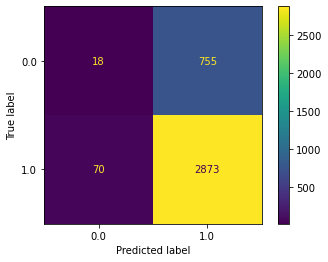

In [354]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(rf_clf, X_test, y_test)  
plt.show() 

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors':[1, 3, 5, 7, 9]
}

grid_dclf = GridSearchCV( knn_clf, param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('KNNClassifier 정확도 : {0:.4f}'.format(accuracy))

In [ ]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(ele_X)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = ele_X.values[train_index], ele_X.values[test_index]
        y_train, y_test = ele_Y.values[train_index], ele_Y.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        knn_clf.fit(X_train, y_train) 
        predictions = knn_clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
exec_kfold(knn_clf , folds=5)

In [50]:
# # 12. 모델 학습
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import VotingClassifier
# from sklearn.linear_model import LogisticRegression, RidgeClassifier
# from xgboost import XGBClassifier 
# from sklearn.svm import SVC 
# from sklearn.ensemble import GradientBoostingClassifier

# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import SGDClassifier
# from sklearn.neighbors import KNeighborsClassifier

In [51]:
# print(accuracy_score(pred, y_test), precision_score(pred, y_test), recall_score(pred, y_test))

In [52]:
# vc = VotingClassifier(models, voting='hard')
# vc.fit(ele_X, ele_y)
# predicted = vc.predict(test_x)

In [453]:
ele_X.shape

(18576, 3)

In [454]:
ele_yy.shape

(18576, 1)

In [455]:
x_train, x_test, y_train, y_test = train_test_split(ele_X,ele_yy,test_size=0.2, random_state=123)


x_val, x_test, y_val, y_test = train_test_split(x_test,y_test,test_size=0.5,random_state=123)



In [465]:
x_train = np.asarray(ele_X).astype(np.float32)
x_train.shape

(18576, 3)

In [467]:
y_train = ele_yy
y_train.shape

(18576, 1)

In [468]:
# Keras 패키지 가져오기
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout

In [469]:
# 3. MLP 모델 생성
model = keras.Sequential()

model.add(layers.Dense(input_dim=x_train.shape[1], units=256, activation='relu'))
model.add(layers.Dense(units=128, activation='relu'))
#model.add(Dropout(0.2))

#model.add(layers.Dense(units=64, activation='relu',kernel_regularizer=keras.regularizers.L2(0.1)))
model.add(layers.Dense(units=32, activation='relu'))


model.add(layers.Dense(units=1))


model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 256)               1024      
_________________________________________________________________
dense_21 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_22 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 33        
Total params: 38,081
Trainable params: 38,081
Non-trainable params: 0
_________________________________________________________________


In [470]:
# Compile - Optimizer, Loss function 설정

model.compile(loss='mse', optimizer='adam', metrics='mae')

In [471]:
from tensorflow.keras.callbacks import EarlyStopping

# 빠른 종료
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [473]:
# 5.학습시키기
hist = model.fit(x_train,y_train, validation_data=(x_val, y_val), batch_size=4,epochs=20,verbose=1,validation_split=0.1,callbacks=[early_stopping])


Epoch 1/20
4180/4180 [==============================] - 9s 2ms/step - loss: 0.1856 - mae: 0.3553 - val_loss: 0.1165 - val_mae: 0.3237
Epoch 2/20
4180/4180 [==============================] - 8s 2ms/step - loss: 0.1775 - mae: 0.3506 - val_loss: 0.1103 - val_mae: 0.3136
Epoch 3/20
4180/4180 [==============================] - 8s 2ms/step - loss: 0.1766 - mae: 0.3507 - val_loss: 0.0713 - val_mae: 0.2047
Epoch 4/20
4180/4180 [==============================] - 8s 2ms/step - loss: 0.1757 - mae: 0.3497 - val_loss: 0.1085 - val_mae: 0.3099
Epoch 5/20
4180/4180 [==============================] - 8s 2ms/step - loss: 0.1755 - mae: 0.3504 - val_loss: 0.0962 - val_mae: 0.2835
Epoch 6/20
4180/4180 [==============================] - 8s 2ms/step - loss: 0.1748 - mae: 0.3489 - val_loss: 0.0893 - val_mae: 0.2661
Epoch 7/20
4180/4180 [==============================] - 8s 2ms/step - loss: 0.1748 - mae: 0.3491 - val_loss: 0.0840 - val_mae: 0.2511
Epoch 8/20
4180/4180 [==============================] - 8s 2ms

In [474]:
# 6. Model Evaluate

model.evaluate(x_train, y_train)
model.evaluate(x_test, y_test)

581/581 [==============================] - 1s 1ms/step - loss: 0.1657 - mae: 0.3195


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [ ]:
# 7. 학습 시각화하기


plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'val'], loc='upper left')


plt.show()